In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob

In [3]:
filelist = glob.glob('*.bin')
print filelist

['gate-swp_17-29_13_a.bin', 'gate-swp_17-29_13_b.bin', 'VI-gate_17-19_13_f.bin', 'VI-gate_23-21_13_a.bin', 'VI-gate_23-21_13_b.bin', 'VI-gate_23-21_13_c.bin', 'VI-gate_23-21_13_d.bin', 'VI-gate_23-21_13_e.bin', 'VI-gate_23-21_13_f.bin']


In [17]:
import lvdatatools as lvdt
filelist[-1]

'VI-gate_23-21_13_f.bin'

In [5]:
df = lvdt.vi_gateswp_data(filelist[-1]) # 'VI-gate_23-21_13_f.bin'
df = df.groupby(df.index).mean()
df.columns.name = 'gate'
df.index.name = 'bias'

The names df.columns.name and df.index.name seem to be there just for reference. The only use I can see is if I forget which is which, I can always print df.index.name and sort it out.

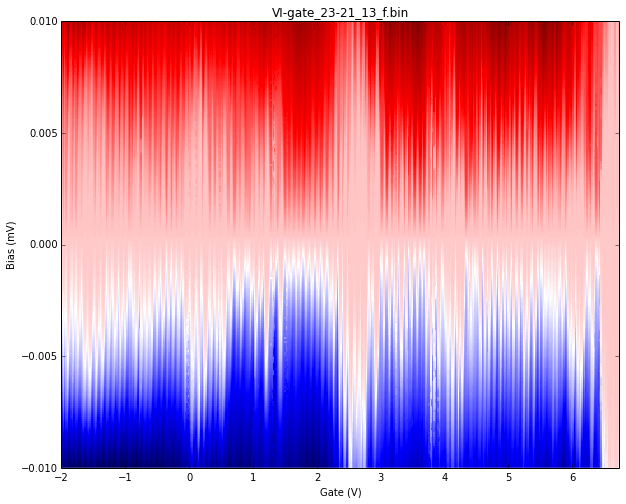

In [6]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1,1,1)
limits = [df.columns[0], df.columns[-3],df.index[0],df.index[-1]]
im = ax.imshow(df.iloc[:,:-2], extent = limits, 
               cmap = plt.cm.seismic,
               origin = 'lower', aspect = 'auto', interpolation = 'None')
ax.set_xlabel('Gate (V)')
ax.set_ylabel('Bias (mV)')
ax.set_title(filelist[-1])

Look at a closer section to see what's up with the resolution

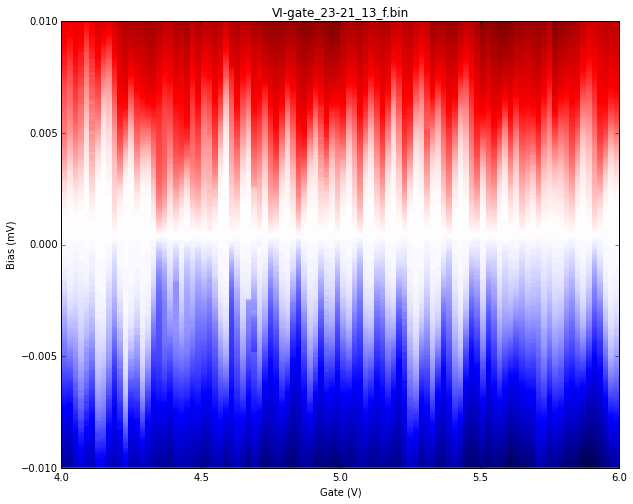

In [7]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1,1,1)
limits = [df.columns[300], df.columns[400],df.index[0],df.index[-1]]
im = ax.imshow(df.iloc[:,300:400], extent = limits, 
               cmap = plt.cm.seismic,
               origin = 'lower', aspect = 'auto', interpolation = 'None')
ax.set_xlabel('Gate (V)')
ax.set_ylabel('Bias (mV)')
ax.set_title(filelist[-1])

I'm surprised that it looks so jumpy in the gate. Increase gate delay to 1s for future runs. Also, I'm going to try to do a little rolling average here across the gate values.

In [8]:
df_roll = pd.rolling_mean(df,3, axis=1)

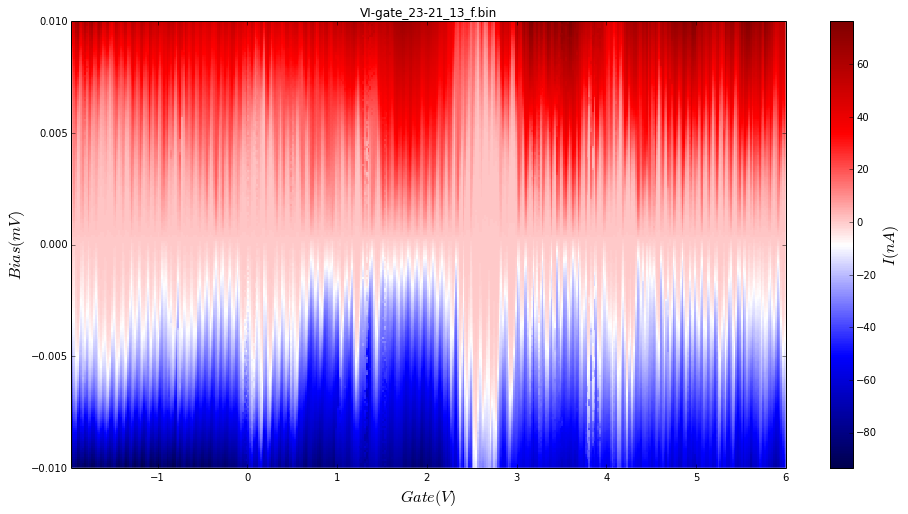

In [9]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(1,1,1)
limits = [df.columns[2], df.columns[400],df.index[0],df.index[-1]]
im = ax.imshow(df.iloc[:,2:400]*1e9, extent = limits, 
               cmap = plt.cm.seismic,
               origin = 'lower', aspect = 'auto', interpolation = 'None')
ax.set_xlabel(r'$Gate (V)$', fontsize=16)
ax.set_ylabel(r'$Bias (mV)$', fontsize=16)
ax.set_title(filelist[-1])
cb = plt.colorbar(im)
cb.set_label(r'$I (nA)$', fontsize=16)

In [10]:
fig.savefig(filelist[-1][:-4]+'.png')

Because of a total disaster with Tyler's battery box, this sample died. Based on one of the others, the level splitting should be ~10-100mV. I need a better resolution scan to make sense of that, I think. Sweeping the gate at 4K before doing the whole diamond scan makes more sense. High resolution gate-sweep then diamond sweep based on that.

In [11]:
cond = df.diff()
cond.max().max()
cond = cond/cond.max().max()

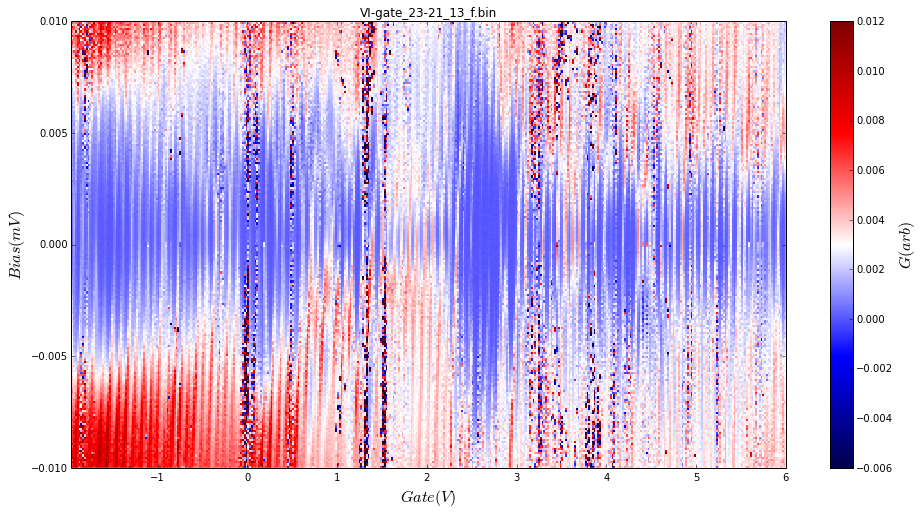

In [15]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(1,1,1)
limits = [cond.columns[2], cond.columns[400],cond.index[0],cond.index[-1]]
im = ax.imshow(cond.iloc[1:,2:400], extent = limits, 
               cmap = plt.cm.seismic, vmin = -0.006, vmax = 0.012, 
               origin = 'lower', aspect = 'auto', interpolation = 'None')
ax.set_xlabel(r'$Gate (V)$', fontsize=16)
ax.set_ylabel(r'$Bias (mV)$', fontsize=16)
ax.set_title(filelist[-1])
cb = plt.colorbar(im)
cb.set_label(r'$G (arb)$', fontsize=16)

In [16]:
fig.savefig(filelist[-1][:-4]+'_cond.png', dpi=200)